In [165]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy import integrate
from sympy import DiracDelta
import math

In [166]:
#Loading Data Into A List For Iteration
Ba_133 = np.loadtxt("Data\Ba-133.txt")
Co_57 = np.loadtxt("Data\Co-57.txt")
Co_60 = np.loadtxt("Data\Co-60.txt")
KCL = np.loadtxt("Data\KCL.txt")
Mn_54 = np.loadtxt("Data\Mn-54.txt")
Na_22 = np.loadtxt("Data\\Na-22.txt") #Double backslash to avoid unicode character error on Windows
Zn_65 = np.loadtxt("Data\Zn-65.txt")

Data = [Ba_133, Co_57, Co_60, KCL, Mn_54, Na_22, Zn_65]

We are going to fit the functional $$\int_E N(E; \mu(E), \sigma(E))P_\gamma(E)dE$$ Where 
$$P_\gamma(E) = aH(E, E_c)+b\delta(E-E_\gamma)$$ to each spectrum to extract the Compton Edge $E_c$ and photopeak $E_\gamma$ energies. The integral results in an error function plus a Gaussian curve so in order to avoid fitting the functional which proves difficult I will fit the error curve and gaussian seperately.

In [167]:
#Defining functions to fit to
def error_func(E,a,b):
   return a*scipy.special.erf(-E)+b

def gaussian(x,a,m,sd):
    return a*math.exp(-(x-m)**2/(2*sd**2))

gaussian_v = np.vectorize(gaussian)
error_func_v = np.vectorize(error_func)

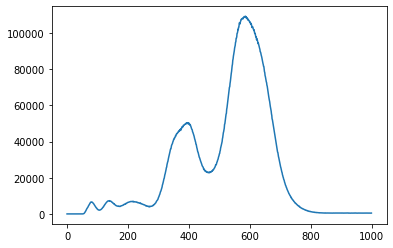

In [168]:
#Extracting Gaussian peaks/error functions by eye (bad practice, but I'm under time constraint)
plt.plot(Data[1][:1000])
Co_57_Gauss = Data[1][500:1000]
Co_57_Gauss_x = np.linspace(500,1000, len(Co_57_Gauss))
Co_57_Error = Data[1][400:450]
Co_57_Error_x = np.linspace(400,450, len(Co_57_Error))

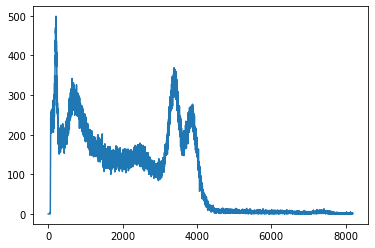

In [169]:
plt.plot(Data[2])
Co_60_Gauss = Data[2][3000:3700]
Co_60_Gauss_x = np.linspace(3000,3700, len(Co_60_Gauss))
Co_60_Error = Data[1][2500:3000]
Co_60_Error_x = np.linspace(2500,3000, len(Co_60_Error))

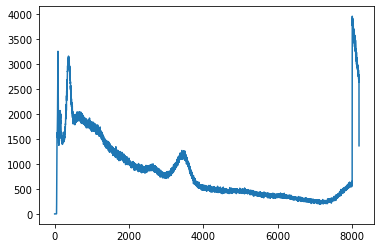

In [170]:
plt.plot(Data[3])
KCL_Gauss = Data[3][3000:4000]
KCL_Gauss_x = np.linspace(3000, 4000, len(KCL_Gauss))
KCL_Error = Data[3][2000:3000]
KCL_Error_x = np.linspace(2000,3000, len(KCL_Error))

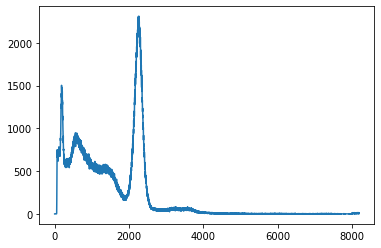

In [171]:
plt.plot(Data[4])
Mn_54_Gauss = Data[4][1900:3000]
Mn_54_Gauss_x = np.linspace(1900, 3000, len(Mn_54_Gauss))
Mn_54_Error = Data[4][1300:1900]
Mn_54_Error_x = np.linspace(1300,1900, len(Mn_54_Error))

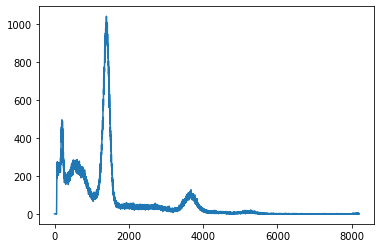

In [172]:
plt.plot(Data[5])
Na_22_Gauss = Data[5][1000:2000]
Na_22_Gauss_x = np.linspace(1000,2000,len(Na_22_Gauss))
Na_22_Error = Data[5][500:1100]
Na_22_Error_x = np.linspace(500,1100, len(Na_22_Error))

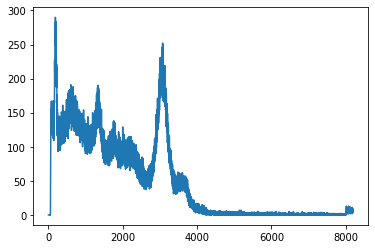

In [173]:
plt.plot(Data[6])
Zn_65_Gauss = Data[6][2500:4000]
Zn_65_Gauss_x = np.linspace(2500, 4000, len(Zn_65_Gauss))
Zn_65_Error = Data[6][1900:2700]
Zn_65_Error_x = np.linspace(1900,2700, len(Zn_65_Error))

In [174]:
#Fitting each curve
Co_57_gauss_params, Co_57_gauss_covs = optimize.curve_fit(gaussian_v, Co_57_Gauss_x, Co_57_Gauss, p0=[1,1000,20])
Co_57_error_params, Co_57_error_covs = optimize.curve_fit(error_func_v, Co_57_Error_x, Co_57_Error, p0=[1,10])

Co_60_gauss_params, Co_60_gauss_covs = optimize.curve_fit(gaussian_v, Co_60_Gauss_x, Co_60_Gauss, p0=[1,1000,20])
Co_60_error_params, Co_60_error_covs = optimize.curve_fit(error_func_v, Co_60_Error_x, Co_60_Error, p0=[1,10])
                                        
KCL_gauss_params, KCL_gauss_covs = optimize.curve_fit(gaussian_v, KCL_Gauss_x, KCL_Gauss, p0=[1,1000,20])
KCL_error_params, KCL_error_covs = optimize.curve_fit(error_func_v, KCL_Error_x, KCL_Error, p0=[1,10])
                                                      
Mn_54_gauss_params, Mn_54_gauss_covs = optimize.curve_fit(gaussian_v, Mn_54_Gauss_x, Mn_54_Gauss, p0=[1,1000,20])
Mn_54_error_params, Mn_54_error_covs = optimize.curve_fit(error_func_v, Mn_54_Error_x, Mn_54_Error, p0=[1,10])
                                                        
Na_22_gauss_params, Na_22_gauss_covs = optimize.curve_fit(gaussian_v, Na_22_Gauss_x, Na_22_Gauss, p0=[1,1000,20])
Na_22_error_params, Na_22_error_covs = optimize.curve_fit(error_func_v, Na_22_Error_x, Na_22_Error, p0=[1,10])
                                                          
Zn_65_gauss_params, Zn_65_gauss_covs = optimize.curve_fit(gaussian_v, Zn_65_Gauss_x, Zn_65_Gauss, p0=[1,1000,20])
Zn_65_error_params, Zn_65_error_covs = optimize.curve_fit(error_func_v, Zn_65_Error_x, Zn_65_Error, p0=[1,10])

In [175]:
print(Co_57_error_params)

[-25735.33109372  11959.9488194 ]


In [176]:
#Function to determine error of each fit
def std_error_of_fit(covs):
    errors = []
    for i in range(len(covs)):
        sd = math.sqrt(abs(covs[i][i]))
        errors.append(sd)

In [177]:
#Error of each fit
Co_57_gauss_error = std_error_of_fit(Co_57_gauss_covs)
Co_57_error_error = std_error_of_fit(Co_57_error_covs)

Co_60_gauss_error = std_error_of_fit(Co_60_gauss_covs)
Co_60_error_error = std_error_of_fit(Co_60_error_covs)

KCL_gauss_error = std_error_of_fit(KCL_gauss_covs)
KCL_error_error = std_error_of_fit(KCL_error_covs)

Mn_54_gauss_error = std_error_of_fit(Mn_54_gauss_covs)
Mn_54_error_error = std_error_of_fit(Mn_54_error_covs)

Na_22_gauss_error = std_error_of_fit(Na_22_gauss_covs)
Na_22_error_error = std_error_of_fit(Na_22_error_covs)

Zn_65_gauss_error = std_error_of_fit(Zn_65_gauss_covs)
Zn_65_error_error = std_error_of_fit(Zn_65_error_covs)

The calibration of bins to energy levels was determined to be $$E=2.7*\text{ bin number}$$ from the GammaVision software

In [178]:
def calibrate(bin):
    return 2.7*bin

In [179]:
#Energy of each feature
Co_57_gamma = calibrate(Co_57_gauss_params[2])
print(Co_57_gamma)
Co_60_gamma = calibrate(Co_60_gauss_params[2])
print(Co_60_gamma)
KCL_gamma = calibrate(KCL_gauss_params[2])
print(KCL_gamma)
Mn_54_gamma = calibrate(Mn_54_gauss_params[2])
print(Mn_54_gamma)
Na_22_gamma = calibrate(Na_22_gauss_params[2])
print(Na_22_gamma)
Zn_65_gamma = calibrate(Zn_65_gauss_params[2])
print(Zn_65_gamma)

Co_57_compton = calibrate(Co_57_error_params[1])
print(Co_57_compton)
Co_60_compton = calibrate(Co_60_error_params[1])
print(Co_60_compton)
KCL_compton = calibrate(KCL_error_params[1])
print(KCL_compton)
Mn_54_compton = calibrate(Mn_54_error_params[1])
Na_22_compton = calibrate(Na_22_error_params[1])
Zn_65_compton = calibrate(Zn_65_error_params[1])

171.9922601315065
54.0
54.0
54.0
251.10163873278634
54.0
32291.861812367097
-1563.0854044787736
-317.79676955216763


In [180]:
c = 3e8 #m/s
m = 511 #kev

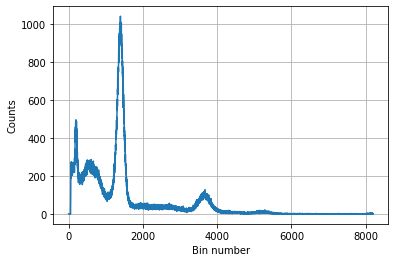

In [184]:
sodium22 = plt.plot(Data[5])
plt.xlabel("Bin number")
plt.ylabel("Counts")
plt.grid()

In [197]:
def predicted(p):
    return math.sqrt(p**2*(c)**2+.511*2)-.511
predicted_v = np.vectorize(predicted)
x_data = np.linspace(0,1e-6, 100000)
y_data = predicted_v(x_data)

x_obs = [6.7e-7, 1.7e-6, 2.26e-6, 2.83e-6, 4.67e-6]
y_obs = [200, 509, 677, 848, 1400 ]

NameError: name 'x_obs' is not defined

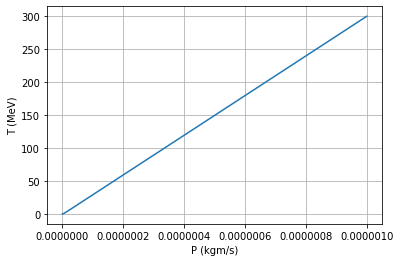

In [201]:
plotatron = plt.plot(x_data, y_data)
plt.grid()
plt.xlabel("P (kgm/s)")
plt.ylabel("T (MeV)")
plt.scatter(x_obs, y_obs, "r")